# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np


# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/colab/Final Project/LifeExpectancy.csv')
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Mô tả các Dataset và các feature
+ Dataset này được thu thập bởi WHO từ nhiều nước khác nhau trên thế giới. Mỗi hàng là các chỉ số của một quốc giá trong 1 năm cụ thể.


- Country: Tên quốc gia
- Year: Năm
- Status: Trạng thái phát triển hoặc đang phát triển
- Life expectancy: Tuổi thọ trung bình
- Adult Mortality: Tỷ lệ tử vong ở người lớn cả hai giới (xác suất tử vong giữa 15 và 60 tuổi trên mỗi 1000 dân số)
- infant deaths: Số trẻ sơ sinh chết trong mỗi 1000 dân số
- Alcohol: Tiêu thụ rượu theo đầu người (15+) (tính bằng lít cồn tinh khiết)
- Percentage expenditure: Chi phí cho sức khỏe so với tổng sản phẩm quốc nội trên đầu người (%)
- Hepatitis B: Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ sơ sinh (%)
- Measles: Số trường hợp sởi (sốt và phát ban) được báo cáo trên mỗi 1000 dân số
- BMI: Chỉ số cơ thể trung bình của toàn bộ dân số
- under-five deaths: Số trẻ dưới 5 tuổi chết trong mỗi 1000 dân số
- Polio: Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ sơ sinh (%)
- Total expenditure: Chi phí chính phủ tổng cộng cho sức khỏe so với tổng chi phí chính phủ (%)
- Diphtheria: Tỷ lệ tiêm chủng Diphtheria, tetanus toxoid và pertussis (DTP3) ở trẻ sơ sinh (%)
- HIV/AIDS: Số lượng tử vong HIV/AIDS trên 1000 trẻ sơ sinh (0-4 tuổi)
- GDP: Sản phẩm quốc nội sản phẩm trên đầu người (tính bằng USD)
- Population: Dân số của quốc gia
- thinness 1-19 years: Sự phổ biến của suy dinh dưỡng ở trẻ em và thanh niên từ 10 đến 19 tuổi (%)
- thinness 5-9 years: Sự phổ biến của suy dinh dưỡng ở trẻ em từ 5 đến 9 tuổi (%)
- Income composition of resources: Chỉ số Phát triển con người về thành lập thu nhập từ nguồn tài nguyên (chỉ số từ 0 đến 1)
- Schooling: trung bình số năm học của dân số

# Exploratory Data Analysis

In [4]:
# Thông tin cơ bản
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2938 non-null   int64  
 1   country                          2938 non-null   object 
 2   year                             2938 non-null   int64  
 3   status                           2938 non-null   object 
 4   life_expectancy                  2928 non-null   float64
 5   adult_mortality                  2928 non-null   float64
 6   infant_deaths                    2938 non-null   int64  
 7   alcohol                          2744 non-null   float64
 8   percentage_expenditure           2938 non-null   float64
 9   hepatitis_b                      2385 non-null   float64
 10  measles                          2938 non-null   int64  
 11  bmi                              2904 non-null   float64
 12  under_five_deaths   

+ Nhìn vào thông tin ta thấy có vài hàng có các giá trị null

<Axes: title={'center': 'Null Information'}, xlabel='features', ylabel='count'>

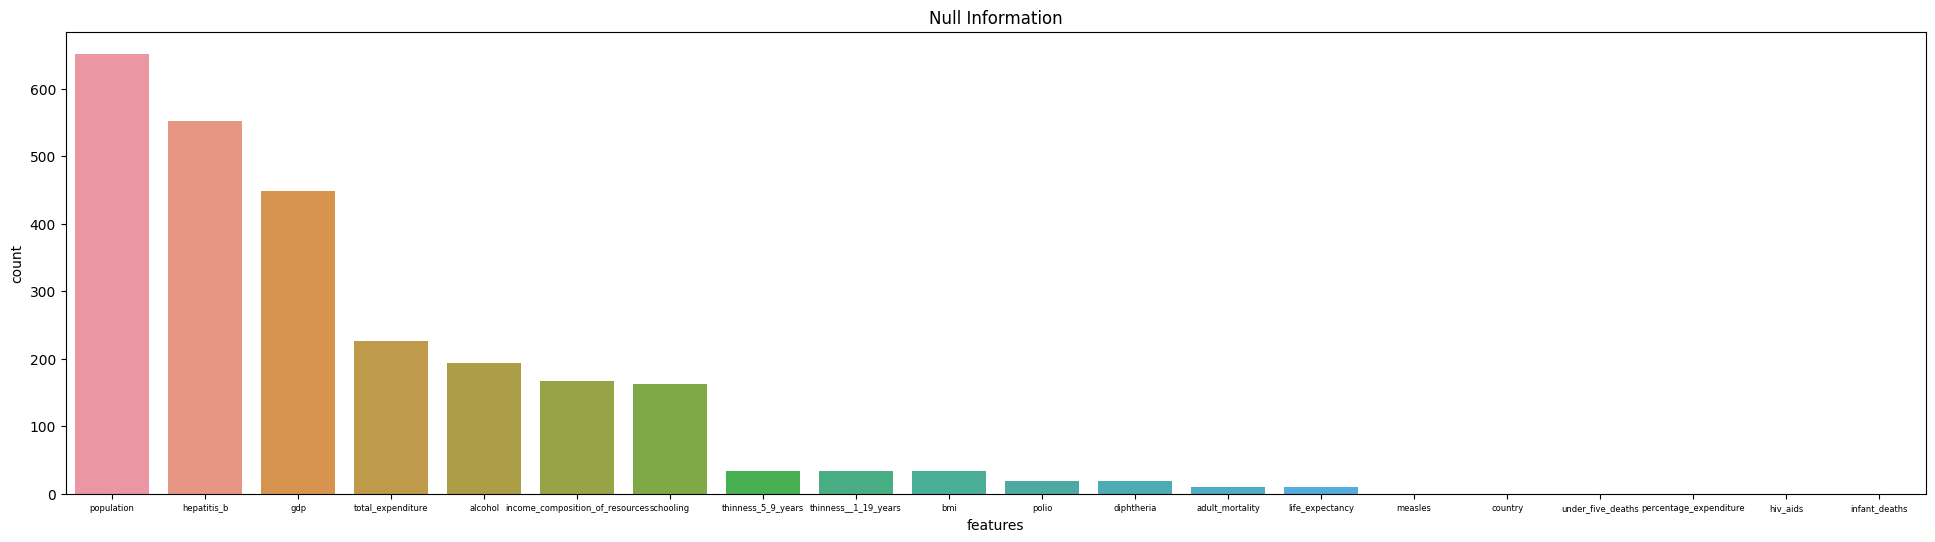

In [5]:
# kiểm tra các trường bị thiếu dữ liệu
plt.figure(figsize=(24,6))
plt.title('Null Information')
plt.xlabel('features')
plt.ylabel('count')
missing_count = pd.DataFrame(data.isnull().sum(), columns=['count']).sort_values(by=['count'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','count']
plt.xticks(fontsize=6)
sns.barplot(x='features',y='count', data = missing_count)

In [6]:
missing_values = data.isnull().sum()
missing_values

Unnamed: 0                           0
country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

Những trường thường bị thiếu thông tin như: **population, hepatitis_b, gdp** cần cân nhắc loại bỏ để tránh sai số cho model.

In [7]:
# Thống kê mô tả của các cột số
data.describe()

,Unnamed: 0,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,1468.500000,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,848.271871,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,734.250000,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,1468.500000,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2202.750000,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2937.000000,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


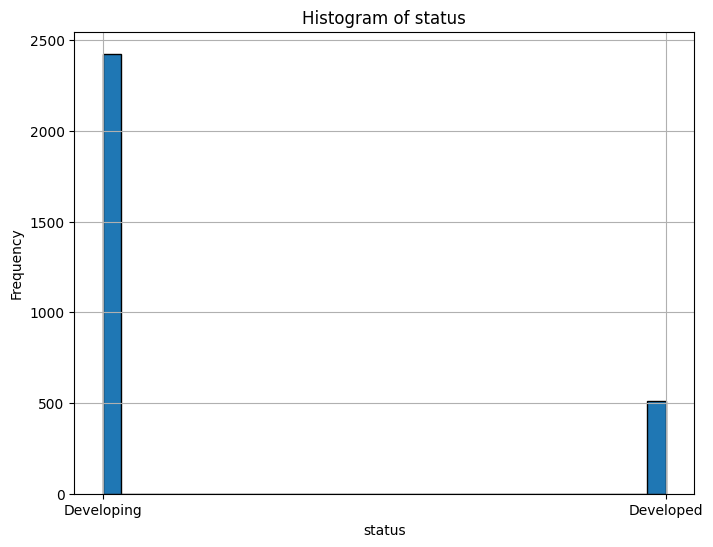

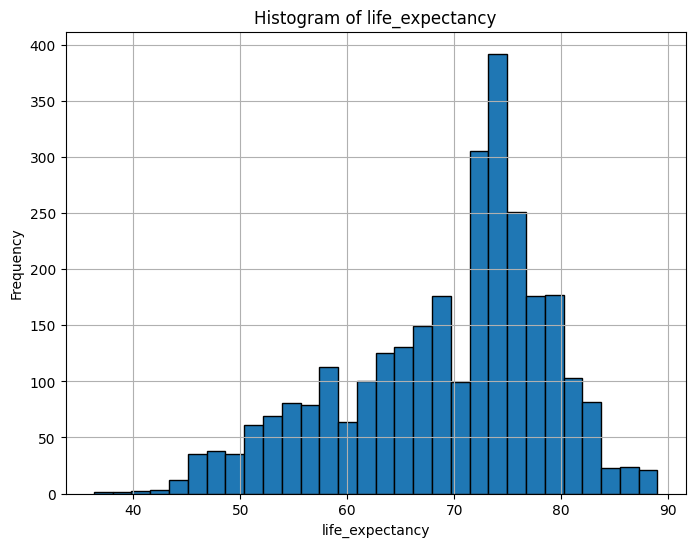

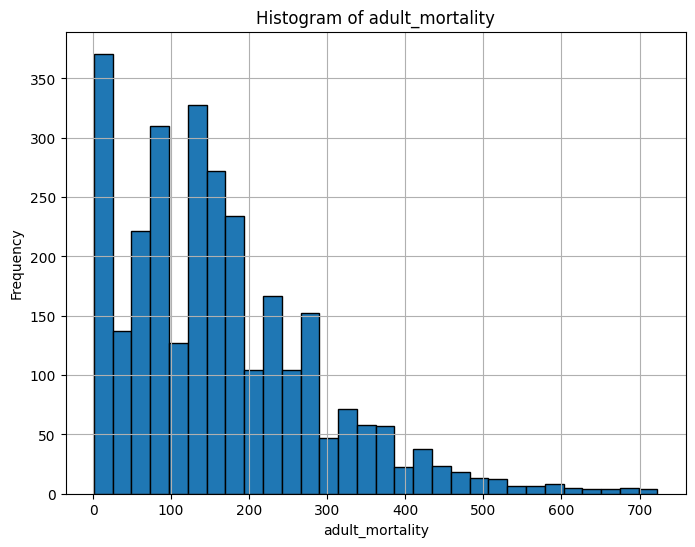

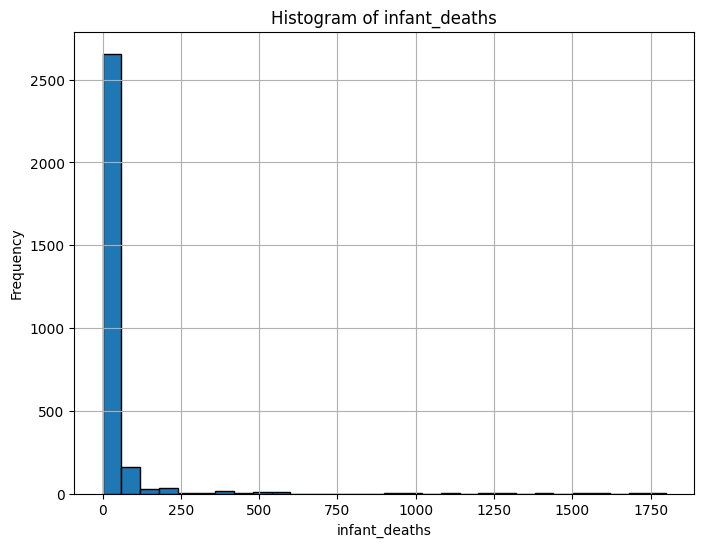

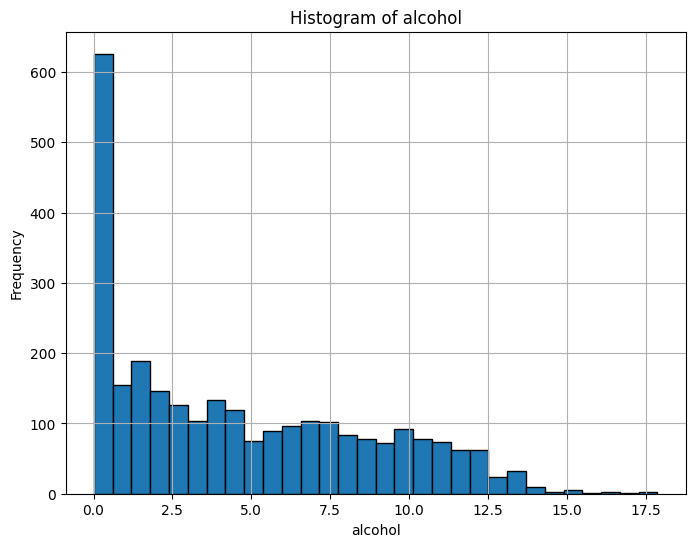

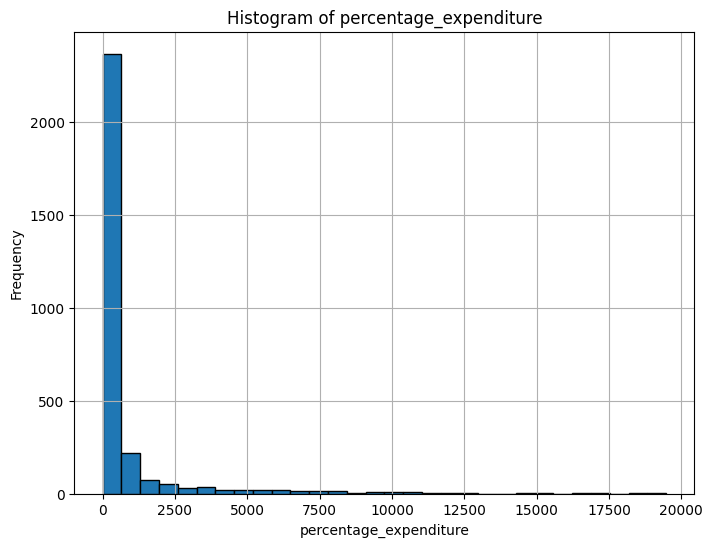

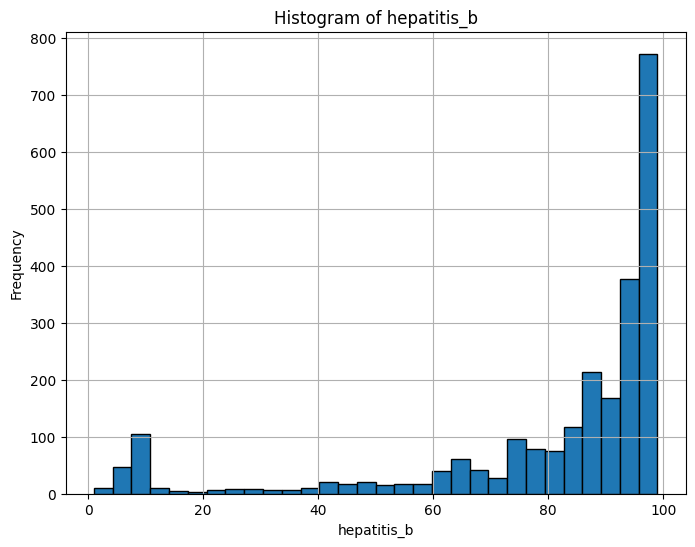

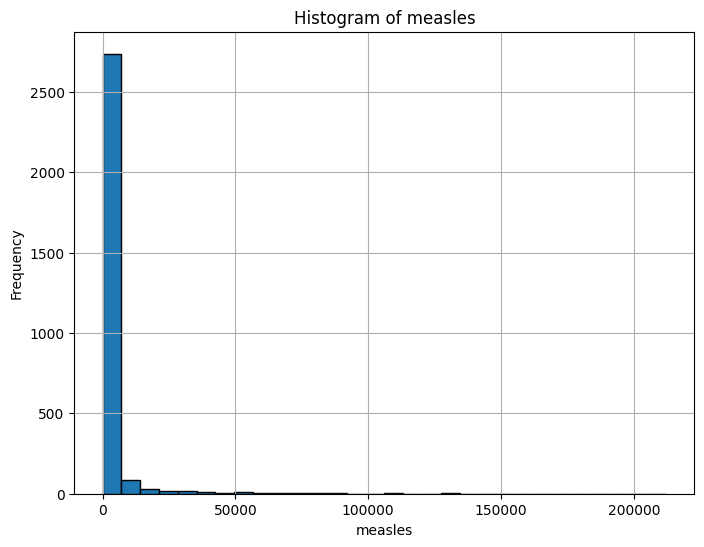

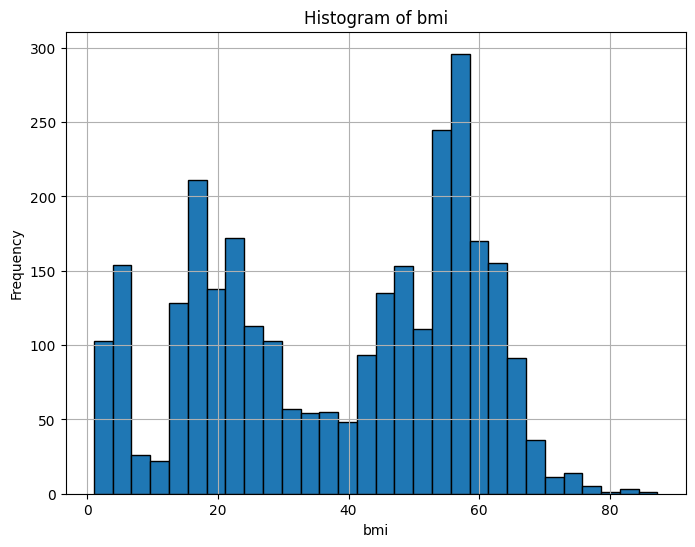

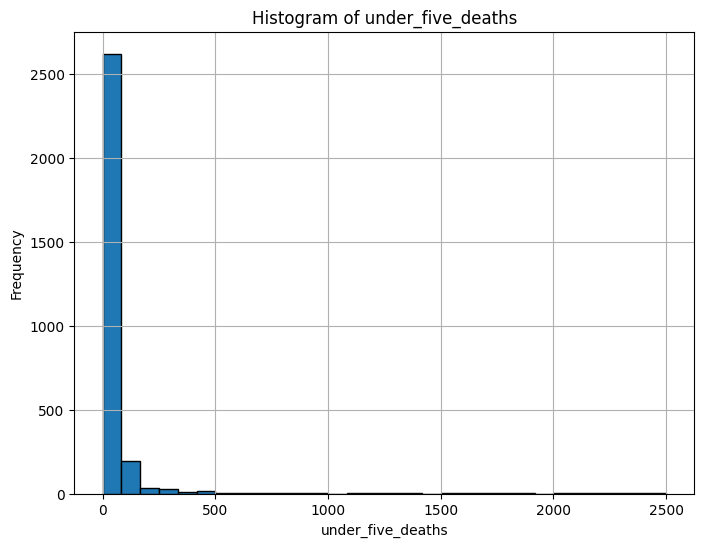

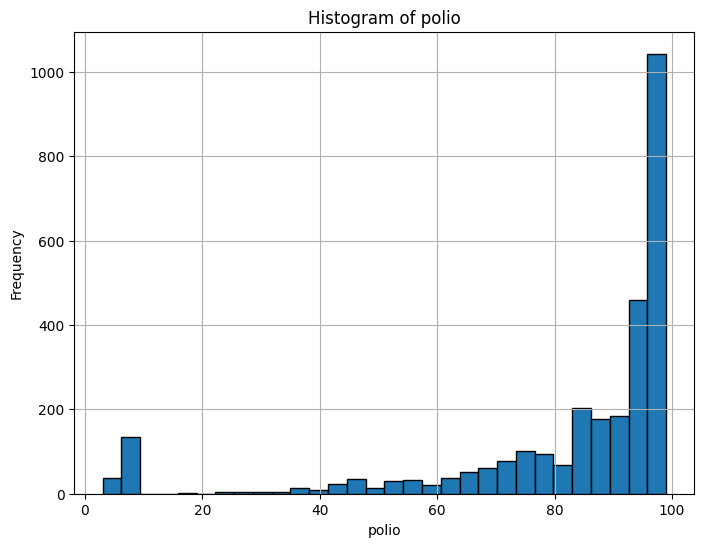

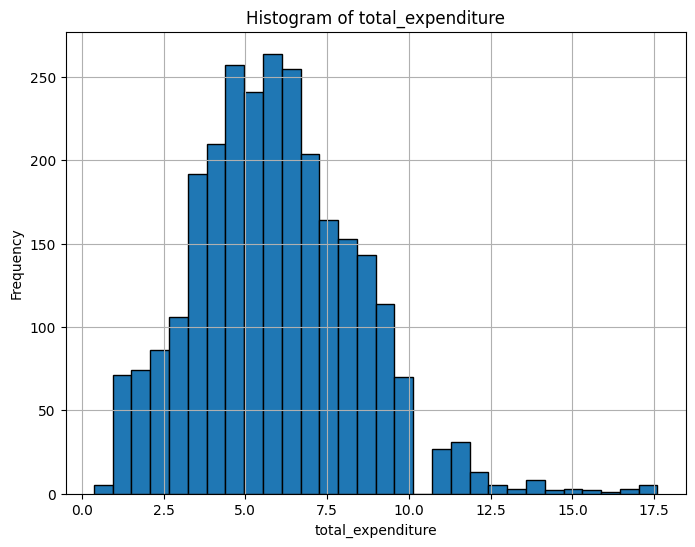

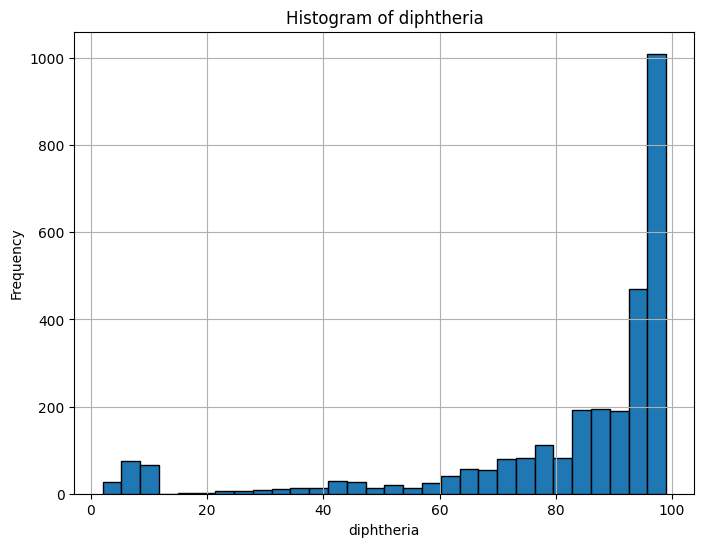

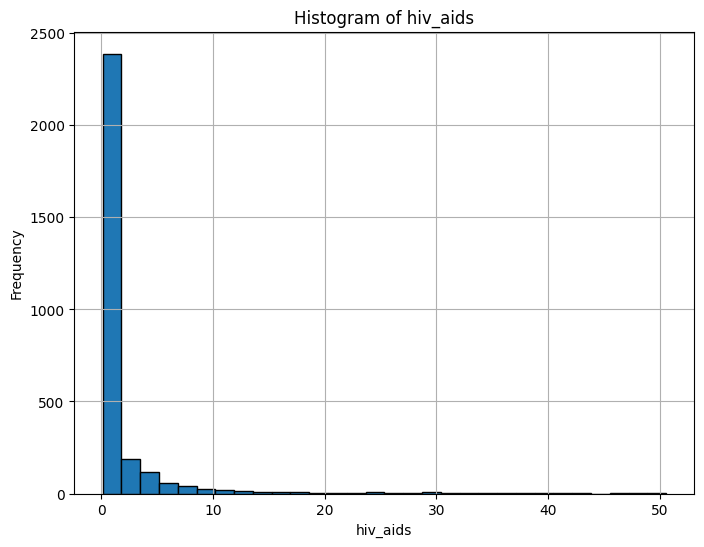

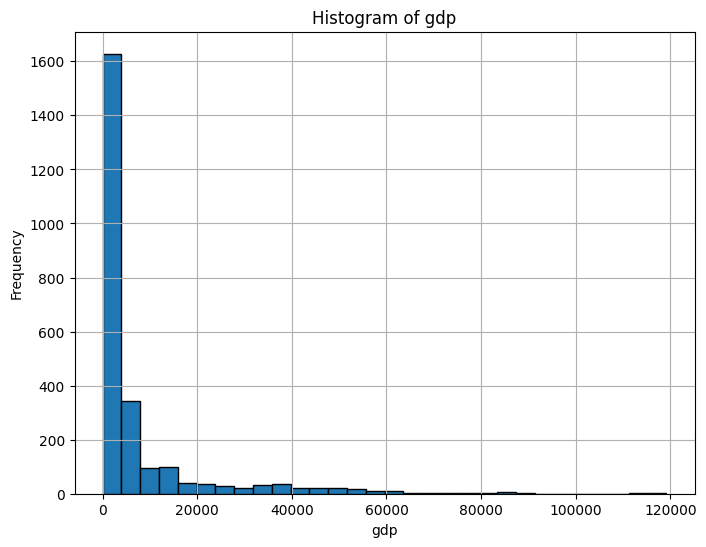

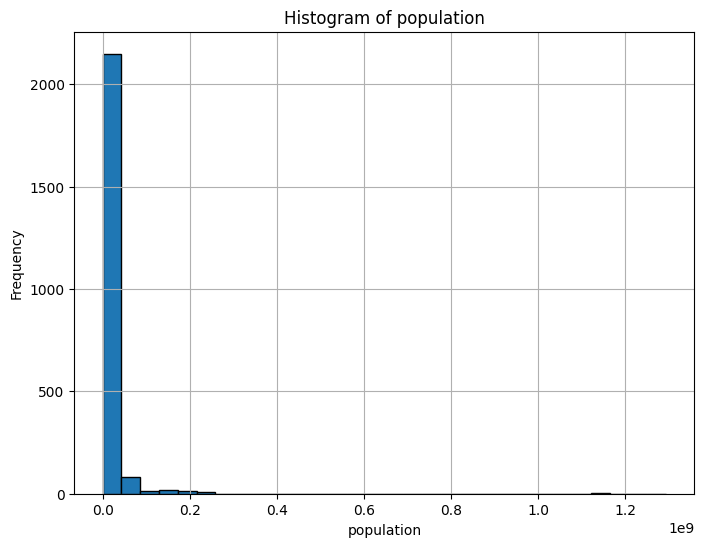

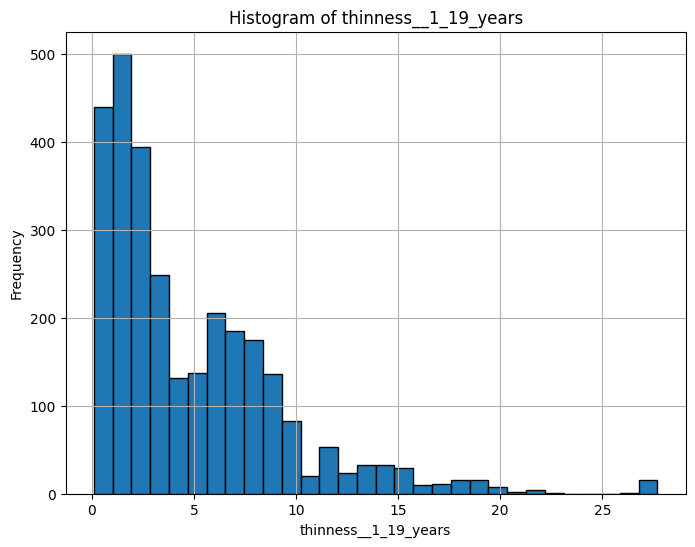

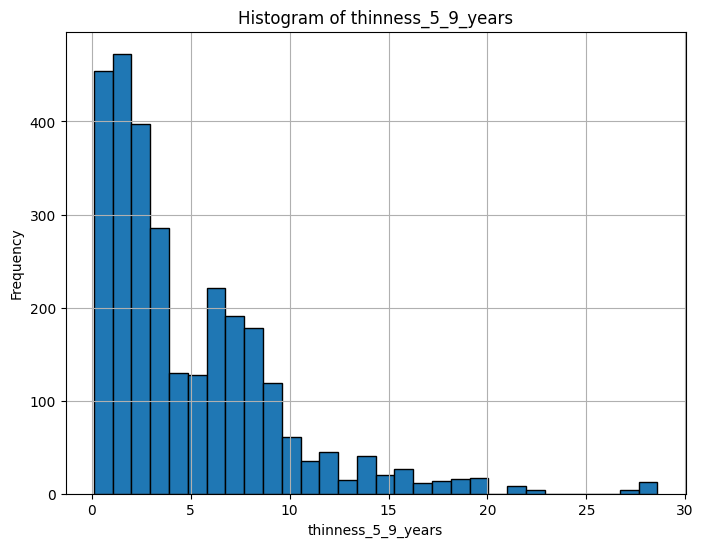

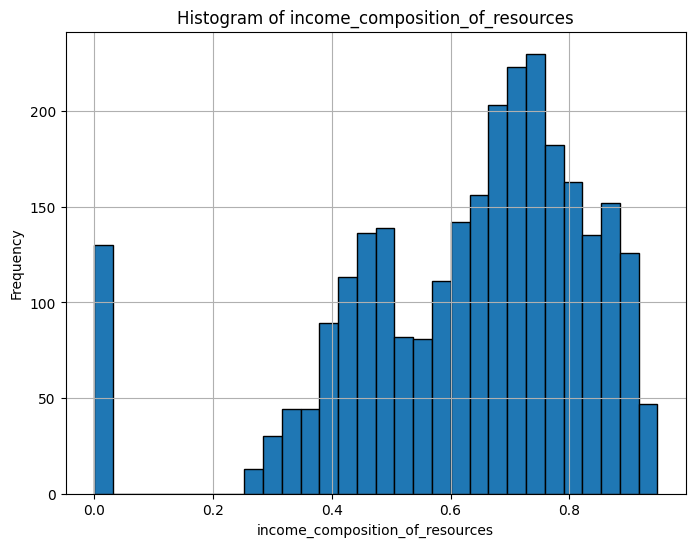

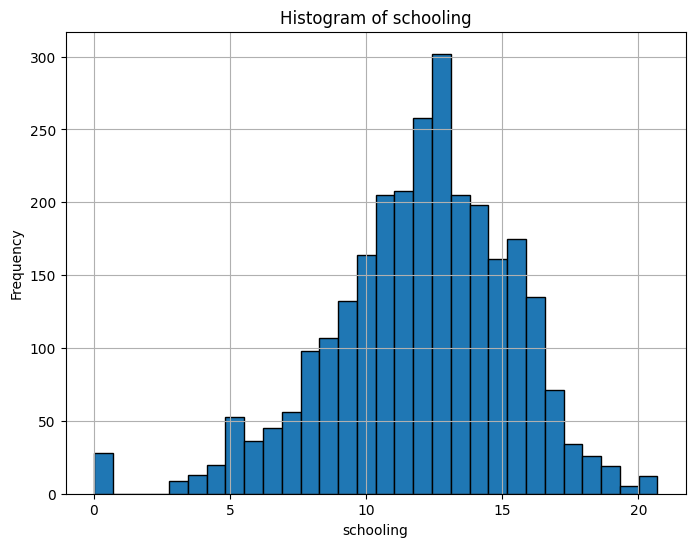

In [8]:
# Vẽ biểu đồ histogram cho từng cột
columns_to_plot = [col for col in data.columns if col not in ['Unnamed: 0','country', 'year']]

for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

**Thông tin 1 số cột:**

**year**: Dữ liệu thuộc vào khoảng từ năm 2000 đến 2015.

**life_expectancy**: Tuổi thọ trung bình có giá trị trung bình là 69.22, giá trị tối thiểu là 36.3 và tối đa là 89.0.

**adult_mortality**: Tỷ lệ tử vong người lớn có giá trị trung bình là 164.8, giá trị tối thiểu là 1 và tối đa là 723.

**infant_deaths**: Số trẻ sơ sinh chết trung bình là 30.3.

**alcohol**: Tiêu thụ rượu trung bình là 4.60, có giá trị tối thiểu là 0.01 và tối đa là 17.87.

**percentage_expenditure**: Chi phí cho sức khỏe trung bình là 738.25.


...


<ipython-input-9-e18bf3aaedfe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


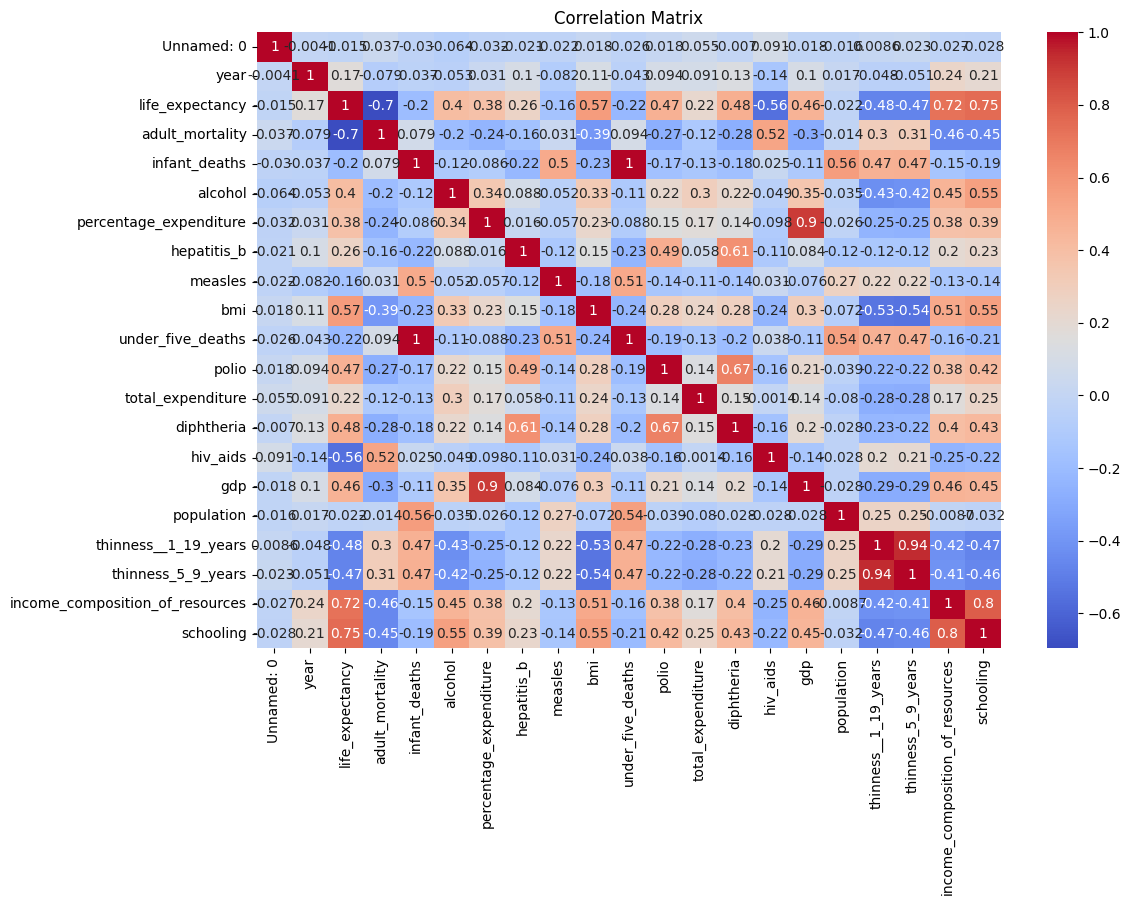

In [9]:
# Vẽ biểu đồ tương quan giữa các cột
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Life expectancy tương quan đáng kể với Adult Mortality, BMI, Schooling, HIV/AIDS, ICOR, and GDP.
Với 1 số nhận xét sau:
+ Life expectancy và Adult Mortality có mối tương quan nghịch cao, điều này đúng với thực tế.
+ BMI có mối tương quan dương với Life expectancy.
+ GDP cũng có mối tương quan dương với Life expectancy, có thể suy ra rằng khi GDP của một quốc gia tăng thì Life expectancy cũng tăng.
+ Schooling có mối tương quan dương cao với Life expectancy. Việc học tập đúng cách sẽ dẫn đến việc áp dụng các thói quen và kỷ luật lành mạnh giúp tuổi thọ cao hơn.

Loại bỏ 1 trường trong các cặp trường có tương quan nhiều với nhau như: **thinness 1-19 years &thinness 5-9 years, under-five deaths & infant deaths, gdp & percentage expenditure**

# Data Preprocessing

In [10]:
#Điền các giá trị thiếu (NaN) trong DataFrame data bằng giá trị trung bình của từng cột số liệu.
data = data.fillna(data.median(numeric_only = True))


In [11]:
data.isna().any()

Unnamed: 0                         False
country                            False
year                               False
status                             False
life_expectancy                    False
adult_mortality                    False
infant_deaths                      False
alcohol                            False
percentage_expenditure             False
hepatitis_b                        False
measles                            False
bmi                                False
under_five_deaths                  False
polio                              False
total_expenditure                  False
diphtheria                         False
hiv_aids                           False
gdp                                False
population                         False
thinness__1_19_years               False
thinness_5_9_years                 False
income_composition_of_resources    False
schooling                          False
dtype: bool

In [12]:
# Encoding các features dữ liệu
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

data = pd.get_dummies(data, columns=categorical_columns)

In [13]:
# Chia dữ liệu thành new_data (bằng cách loại bỏ các cột không cần thiết) và target
new_data = data.drop(columns=['Unnamed: 0','life_expectancy', 'thinness_5_9_years','infant_deaths', 'gdp','population','hepatitis_b'])  # Loại bỏ một số cột
target = data['life_expectancy']

In [14]:
new_data.head()

,year,adult_mortality,alcohol,percentage_expenditure,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,thinness__1_19_years,income_composition_of_resources,schooling,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Monaco,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe,status_Developed,status_Developing
0,2015,263.0,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,0.479,10.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [15]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.2, random_state=42)

In [16]:
# kiểm tra shape của train và test data
print(f"Shape of train data is : {X_train.shape}")
print("-" * 30)
print(f"Shape of test data is : {X_test.shape}")

Shape of train data is : (2350, 209)
------------------------------
Shape of test data is : (588, 209)


In [17]:
X_train.head(2)

,year,adult_mortality,alcohol,percentage_expenditure,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,thinness__1_19_years,income_composition_of_resources,schooling,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Monaco,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe,status_Developed,status_Developing
456,2007,126.0,5.28,345.463714,0,25.5,0,98.0,4.30,98.0,0.6,8.1,0.602,11.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
X_test.head(2)

,year,adult_mortality,alcohol,percentage_expenditure,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,thinness__1_19_years,income_composition_of_resources,schooling,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Monaco,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe,status_Developed,status_Developing
2546,2006,123.0,0.97,122.652333,517,48.5,10,83.0,3.78,8.0,0.1,6.4,0.636,11.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [19]:
# Tạo empty DataFrame cho modeling
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score'])
# Định nghĩa model selection
def select_model(model_name):
    global Modeling

    model = model_name

    # Fit model
    model.fit(X_train, y_train)

    # Tính điểm của mô hình trên dữ liệu huấn luyện
    train_score = model.score(X_train, y_train)
    print(f"Score of the {model_name} model on the training data is: {train_score}")

    # Dự đoán trên data
    predictions = np.round(model.predict(X_test), decimals = 1)

    # Xem R2 score trên test data
    test_r2_score = r2_score(y_test, predictions)
    print(f"R2 score of the {model_name} model on the test data is: {test_r2_score}")

    # Tạo một DataFrame cho điểm số của mô hình hiện tại
    model_scores = pd.DataFrame({'Model': [model_name], 'Training Score': [train_score], 'Test R2 Score': [test_r2_score]})

    # Nối DataFrame model_scores với DataFrame Modeling
    Modeling = pd.concat([Modeling, model_scores], ignore_index = True)
    #trả về model
    return model

In [20]:
select_model(LinearRegression())

Score of the LinearRegression() model on the training data is: 0.962259958334763
R2 score of the LinearRegression() model on the test data is: -87078895723.83366


LinearRegression()

In [21]:
select_model(SVR(C = 9.0, epsilon = 0.9, kernel = 'rbf'))

Score of the SVR(C=9.0, epsilon=0.9) model on the training data is: 0.41362265877848703
R2 score of the SVR(C=9.0, epsilon=0.9) model on the test data is: 0.40029486574688355


SVR(C=9.0, epsilon=0.9)

In [22]:
select_model(RandomForestRegressor(n_estimators = 100, max_depth=7, min_samples_split=5))

Score of the RandomForestRegressor(max_depth=7, min_samples_split=5) model on the training data is: 0.9692538742535342
R2 score of the RandomForestRegressor(max_depth=7, min_samples_split=5) model on the test data is: 0.953751353981796


RandomForestRegressor(max_depth=7, min_samples_split=5)

In [23]:
selected_model = select_model(GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_split = 5))

Score of the GradientBoostingRegressor(max_depth=6, min_samples_split=5) model on the training data is: 0.9905102407634027
R2 score of the GradientBoostingRegressor(max_depth=6, min_samples_split=5) model on the test data is: 0.9709042769329521


#Kết Luận
1. Linear Regression Model:
+ Điểm R2 âm là dấu hiệu không tốt, cho thấy mô hình không phù hợp với dữ liệu kiểm tra và có thể đã overfitting.
2. Support Vector Regressor (SVR):
+ Mô hình có điểm số khá thấp trên cả dữ liệu huấn luyện và kiểm tra, cho thấy mô hình không hiệu quả.
3. Random Forest Regressor:
+ Mô hình có điểm số tốt trên cả dữ liệu huấn luyện và kiểm tra, chỉ có chút chênh lệch, cho thấy mô hình có khả năng làm việc tốt và không bị overfitting.
4. Gradient Boosting Regressor:
+ Mô hình có điểm số rất cao trên cả dữ liệu huấn luyện và kiểm tra, chỉ có sự chênh lệch nhỏ, cho thấy mô hình hiệu quả và không bị overfitting.

Tổng quát, mô hình Gradient Boosting Regressor (max_depth=6, min_samples_split=5) có vẻ phù hợp nhất với dữ liệu và có khả năng dự đoán tốt trên cả dữ liệu huấn luyện và kiểm tra.

In [25]:
# Lưu mô hình vào file
with open('model_gb_reg.pkl', 'wb') as f:
    pickle.dump(selected_model, f)